In [395]:
import numpy as np
import matplotlib.pyplot as plt

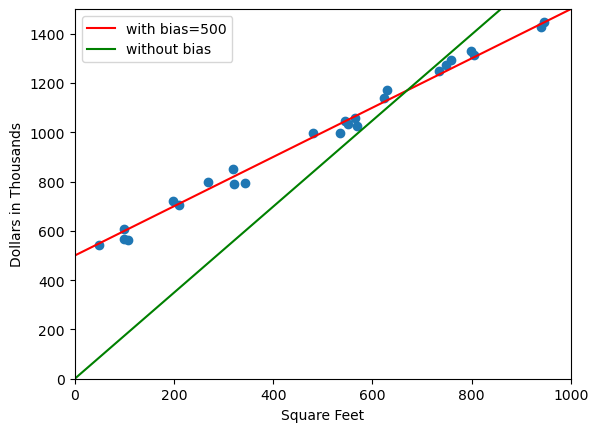

In [467]:
plt.xlim([0, 1000])
plt.ylim([0, 1500])

x = np.random.randint(0, 1000, 25)
y = x + 500 + np.random.randint(-50, 50, 25)
plt.scatter(x, y)


# best fit line
m = 1
b = 500
x = np.linspace(0, 1000, 100)
y = m * x + b
plt.plot(x, y, color="red", label="with bias=500")

# without bias
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(x.reshape(-1, 1), y)

m = model.coef_[0]
x = np.linspace(0, 1000, 100)
y = m * x
plt.plot(x, y, color="green", label="without bias")


plt.ylabel("Dollars in Thousands")
plt.xlabel("Square Feet")
plt.legend()
plt.savefig("Figure_1.png")
plt.show()


In [508]:
# Data

x = np.random.randn(20, 1)
y = 10 * x + 25


In [518]:
class LinearRegression():
    def __init__(self, lr=0.01, epochs=10000):
        self.lr = lr
        self.epochs = epochs

    
    def fit(self, x, y):
        assert x.shape[0] == y.shape[0] # same number of batches

        x = np.atleast_2d(x)
        y = np.atleast_2d(y)
        self.x = x
        self.y = y

        self.w = np.random.randn(x.shape[1], y.shape[1])
        self.b = np.random.randn(1, y.shape[1]) # B, M but Batch dimension is vectorized

    def solve(self):
        x = np.concatenate((self.x, np.ones(self.x.shape)), axis=1)
        y = self.y
        w = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
        return w

    def loss_fn(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    def forward(self, x):
        return np.dot(x, self.w) + self.b
    
    def train(self):
        losses = []
        for i in range(self.epochs):
            y_pred = self.forward(self.x)
            loss = self.loss_fn(self.y, y_pred)

            x = self.x
            w = self.w
            b = self.b

            dl_dw = -2 * x.T.dot(y - x.dot(w) - self.b) / x.shape[0]
            dl_db = -2 * np.sum(y - x.dot(w) - b, axis=0) / x.shape[0]

            self.w -= self.lr * dl_dw
            self.b -= self.lr * dl_db

            losses.append(loss)
        self.losses = losses
    
    def plot(self):
        plt.plot(self.losses)
        plt.show()


In [519]:
model = LinearRegression()
model.fit(x, y)


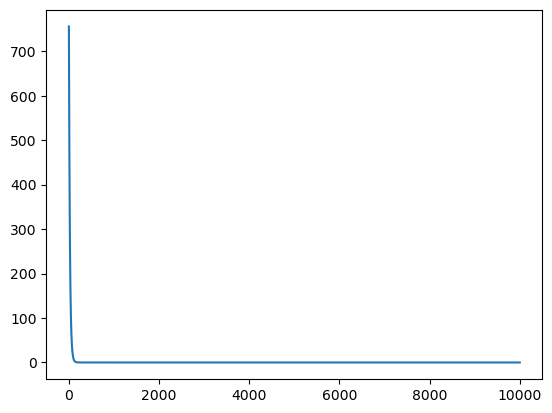

Back prop solution: [[10.]] [[25.]]
Analytical solution: [[10.]
 [25.]]


In [520]:
model.train()
model.plot()
print("Back prop solution:", model.w, model.b)
print("Analytical solution:", model.solve())


In [339]:
x = np.random.randn(20, 5)
y = (np.sum(x, axis=1, keepdims=True)+0.5 > 0).astype(int)

In [340]:
class LogisticRegression():
    def __init__(self, lr=0.01, epochs=50000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, x, y):
        assert x.shape[0] == y.shape[0] # same number of batch

        self.x = x
        self.y = y
        self.w = np.random.randn(x.shape[1], y.shape[1])
        self.b = np.random.randn(1, y.shape[1]) # B, M but Batch dimension is vectorized

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def loss_fn(self, y_true, y_pred):
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) 

    def forward(self, x):
        return x.dot(self.w) + self.b
    
    def predict(self, x):
        return self.sigmoid(self.forward(x))

    def train(self):
        losses = []
        scores = []
        for i in range(self.epochs):

            y_pred = self.predict(self.x)
            loss = self.loss_fn(self.y, y_pred)
            losses.append(loss)
            
            dl_dw = -self.x.T.dot(self.y - y_pred)
            dl_db = np.sum(y_pred - self.y, axis=0)
            
            self.w -= self.lr * dl_dw / x.shape[0]
            self.b -= self.lr * dl_db / x.shape[0]

            y_pred[y_pred <0.5] = 0
            y_pred[y_pred >= 0.5] = 1
            score = np.mean(y_pred == y)
            scores.append(score)

        self.losses = losses
        self.scores = scores
        
    def plot(self):
        plt.plot(self.losses)
        plt.title("Cross Entropy Loss")
        plt.show()

        plt.plot(self.scores)
        plt.title("Score")
        plt.show()

In [341]:
model = LogisticRegression()
model.fit(x, y)

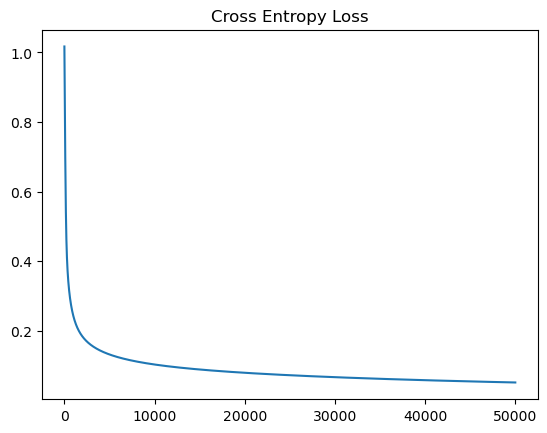

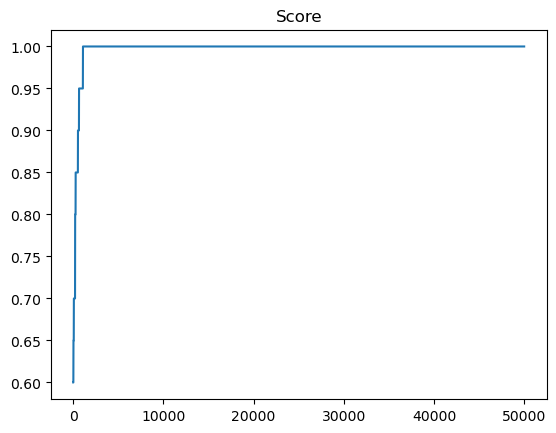

In [342]:
model.train()
model.plot()

In [343]:
x = np.random.randn(20, 5)
y = (np.sum(x, axis=1, keepdims=True)+0.5 > 0).astype(int)
y = np.concatenate([y, 1-y], axis=-1)

In [344]:
model.fit(x, y)

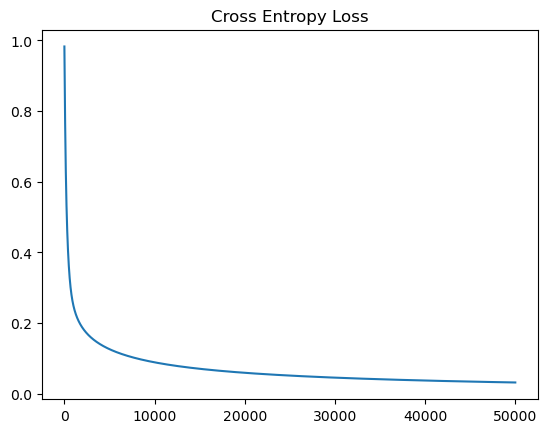

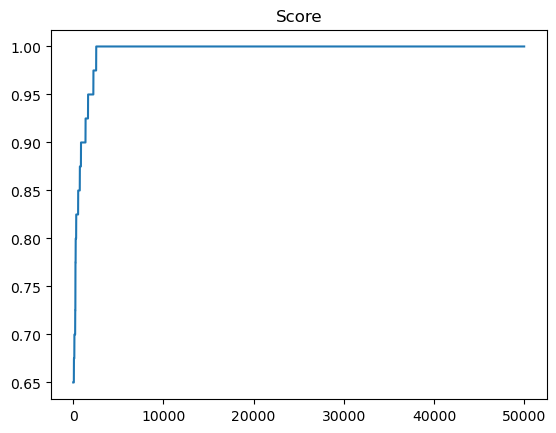

In [345]:
model.train()
model.plot()

In [371]:
x = np.random.randn(20, 5)
y = np.sum(x, axis=1, keepdims=True) + 0.5

In [392]:
# More layers

class DNN():
    def __init__(self, hidden_dim=[4, 3, 2], lr=0.01, epochs=1000):
        self.layers = len(hidden_dim)
        self.hidden_dim = hidden_dim
        self.lr = lr
        self.epochs = epochs

    def fit(self, x, y):
        ws = [] # (L, in_dim, out_dim)
        bs = [] # (L, out_dim)
        for i in range(self.layers + 1):
            if i == 0:
                ws.append(np.random.randn(x.shape[1], self.hidden_dim[i]))
                bs.append(np.random.randn(self.hidden_dim[i]))
            elif i == self.layers:
                ws.append(np.random.randn(self.hidden_dim[i-1], y.shape[1]))
                bs.append(np.random.randn(y.shape[1]))
            else:
                ws.append(np.random.randn(self.hidden_dim[i-1], self.hidden_dim[i]))
                bs.append(np.random.randn(self.hidden_dim[i]))
        self.ws = ws
        self.bs = bs

    def loss_fn(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)
    
    def activation(self, x):
        return 1 / (1 + np.exp(-x))
    
    def activation_derivative(self, x):
        print(self.activation(x).shape)

        return self.activation(x).dot((1 - self.activation(x)).T)
    
    def forward(self, x):
        for i in range(self.layers + 1):
            if i == 0:
                x = np.dot(x, self.ws[i]) + self.bs[i]
            else:
                x = np.dot(x, self.ws[i]) + self.bs[i]
        return x
    
    # def forward(self, x):
        

In [393]:
model = DNN()
model.fit(x, y)

In [394]:
model.activation_derivative(model.forward(x)).shape

(20, 1)


(20, 20)

In [377]:
for w in model.ws: print(w.shape)

(5, 4)
(4, 3)
(3, 2)
(2, 1)
